# There is a car making company that has recently launched a new SUV car. So the company wanted to check how many users from the dataset, wants to purchase the car. The dataset is SUV_Purchase.csv. In this problem, we will predict the purchased variable (Dependent Variable) by using age and salary (Independent variables).

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir("C:\\Users\\bhaskar\\python practice\\datasets")

# load dataset

In [3]:
df=pd.read_csv("SUV_Purchase.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# separate independent and dependant attributes

In [5]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values

# split training testing data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler  
st_x=StandardScaler()
x_train= st_x.fit_transform(x_train)    
x_test= st_x.fit_transform(x_test)  

# prepare the model

In [8]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)

# fit the dataset to model

In [9]:
classifier.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [13]:
x_test

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075],
       [-0.54748976, -0.6488321 ],
       [-0.72296725, -0.46537345],
       [ 0.06668145, -0.46537345],
       [ 0.24215893,  0.20730828],
       [-1.4248772 ,  0.48249625],
       [-0.37201227,  1.43036596],
       [ 0.06668145,  0.20730828],
       [-1.51261594,  0.45191981],
       [ 1.64597884,  1.8278597 ],
       [-0.10879604, -1.47439603],
       [-0.10879604, -0.70998498],
       [ 0.94406888,  2.25592989],
       [ 0.41763642, -0.58767922],
       [ 0.94406888,  1.06344865],
       [-1.16166097, -1.29093738],
       [ 1.11954637,  2.16420057],
       [-0.72296725,  0.5130727 ],
       [-0.63522851,  0.2990376 ],
       [ 0.06668145,

In [11]:
import pickle
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [12]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.88


In [18]:
result=loaded_model.predict([[-5.0,-1.0]])
result

array([0], dtype=int64)

In [19]:
result=loaded_model.predict([[5.0,1.0]])
result

array([1], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


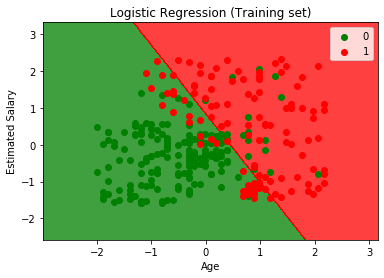

In [14]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('green', 'red'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show() 

#### The green point observations are for which purchased (dependent variable) is probably 0, i.e., users who did not purchase the SUV car.
#### The red point observations are for which purchased (dependent variable) is probably 1 means user who purchased the SUV car.
#### We can also estimate from the graph that the users who are younger with low salary, did not purchase the car, whereas older users with high estimated salary purchased the car.
#### But there are some green points in the red region (Buying the car) and some red points in the green region(Not buying the car). So we can say that younger users with a high estimated salary purchased the car, whereas an older user with a low estimated salary did not purchase the car.

### In the above code, we have imported the ListedColormap class of Matplotlib library to create the colormap for visualizing the result. We have created two new variables x_set and y_set to replace x_train and y_train. 
### After that, we have used the nm.meshgrid command to create a rectangular grid, which has a range of -1(minimum) to 1 (maximum).The pixel points we have taken are of 0.01 resolution.
### To create a filled contour, we have used mtp.contourf command, it will create regions of provided colors (purple and green). In this function, we have passed the classifier.
### predict to show the predicted data points predicted by the classifier.



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


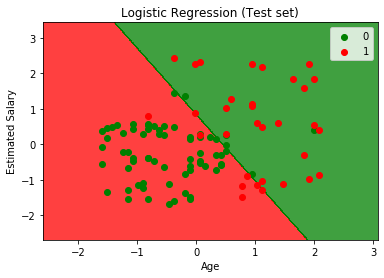

In [26]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('green', 'red'))(i), label = j)  
plt.title('Logistic Regression (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show() 

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[63  5]
 [ 7 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.83      0.78      0.81        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100

Accuracy: 0.88


# Confusion Matrix  (example with a covid test)

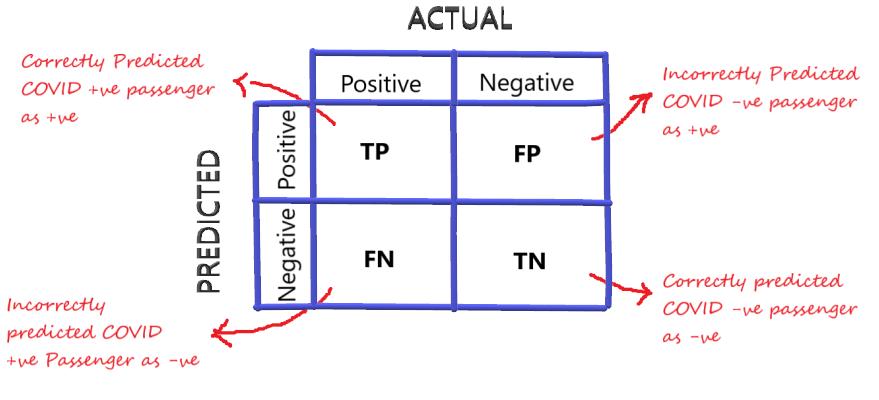

### True Positive (TP): When you predict an observation belongs to a class and it actually does belong to that class. In this case, a passenger who is classified as COVID positive and is actually positive.
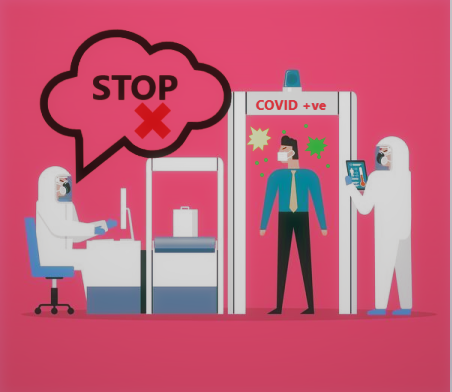

### True Negative (TN): When you predict an observation does not belong to a class and it actually does not belong to that class. In this case, a passenger who is classified as not COVID positive (negative) and is actually not COVID positive (negative).
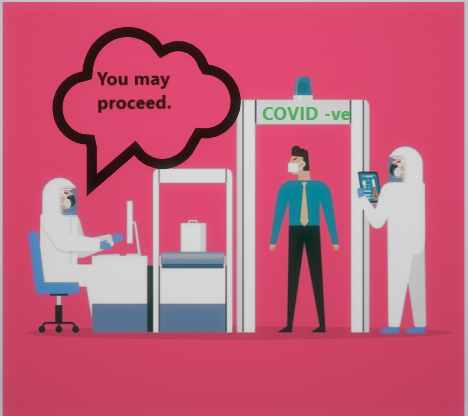

### False Positive (FP): When you predict an observation belongs to a class and it actually does not belong to that class. In this case, a passenger who is classified as COVID positive and is actually not COVID positive (negative).
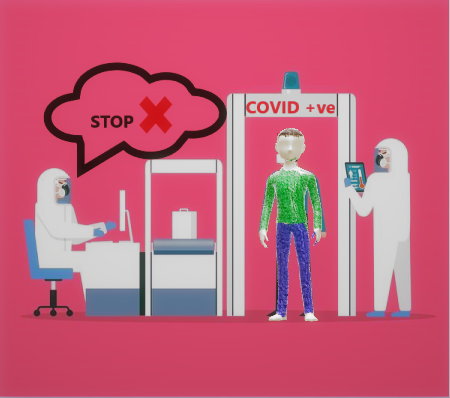

### False Negative(FN): When you predict an observation does not belong to a class and it actually does belong to that class. In this case, a passenger who is classified as not COVID positive (negative) and is actually COVID positive.
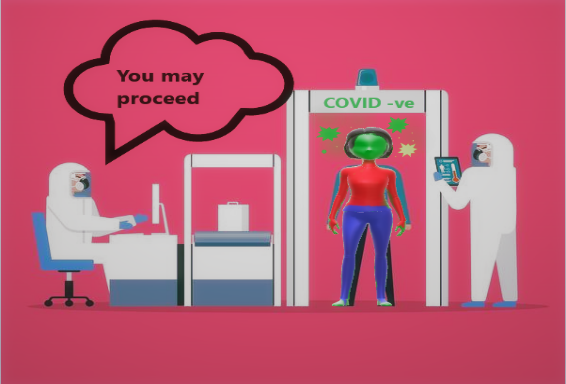

# Accuracy
#### Accuracy = Number of correct predictions / Total number of predictions.
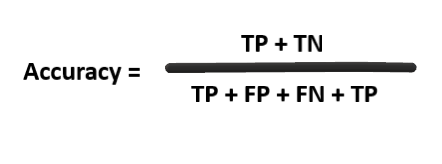
#### let’s consider 50,000 passengers travel per day on an average. Out of which, 10 are actually COVID positive.
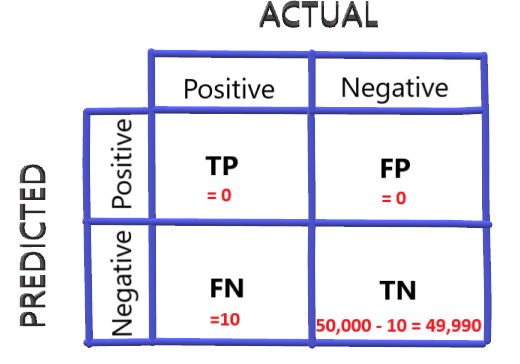

#### Accuracy for this case will be:

#### Accuracy = 49,990/50,000 = 0.9998 or 99.98%

# Recall (Sensitivity or True positive rate)
#### Recall gives the fraction you correctly identified as positive out of all positives.
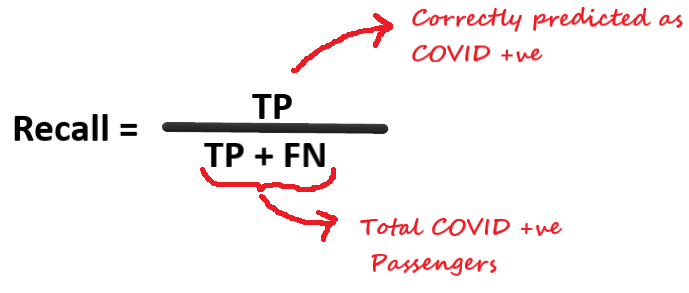

# Precision
#### Precision gives the fraction of correctly identified as positive out of all predicted as positives.
#### It is the Accuracy of positive predictions.
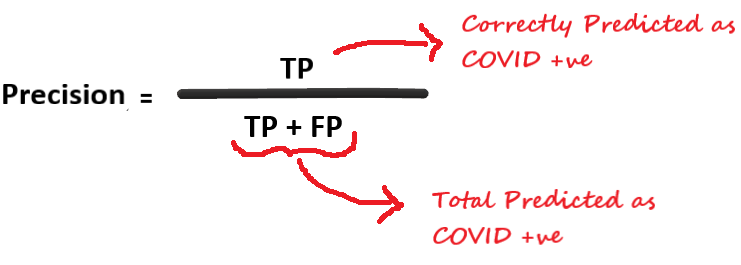

# F1 Score
#### It is defined as the harmonic mean of the model’s precision and recall.
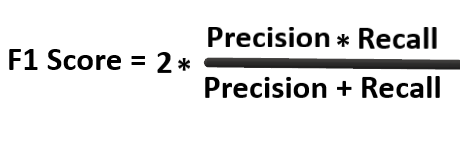